In [81]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def my_RK2(ds,t_span,s0):

    t = t_span[0]  # Initial time
    s = s0  # Initial state
    dt = t_span[1] - t_span[0]  # Time step

    y = [s]
    #function
    for t_next in t_span[1:]:
        k1 = ds(t, s)
        k2 = ds(t+ (1 * dt), s + (1 * dt * k1))

        s = s + 0.5 * dt * (k1 + k2) 
        y.append(s)

        t = t_next


    return [t_span, y]


In [83]:
f = lambda t, s: 2 * np.cos(2*t) * np.exp(np.sin(2*t))
t_span = np.linspace(0, np.pi, 100)
s0 = 1

In [84]:
def s(t):
    return np.exp(np.sin(2*t))

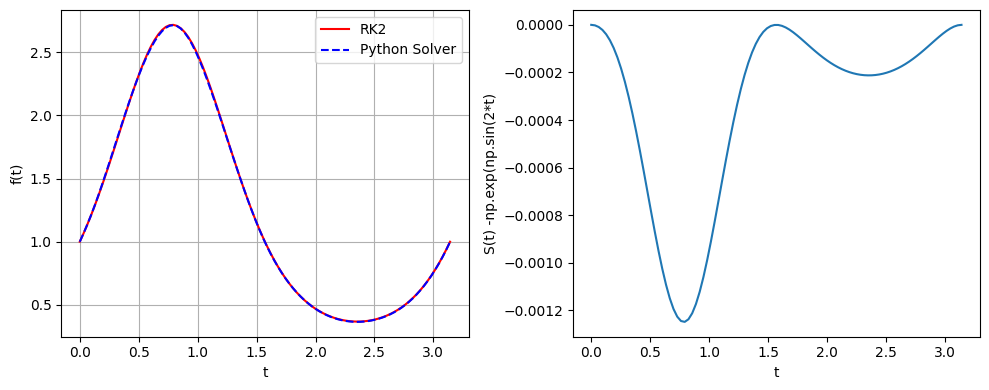

In [85]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
t, s = my_RK2(f, t_span, s0)
plt.plot(t, s, "r-",label="RK2") 
sol = solve_ivp(f, [0, np.pi], [s0], t_eval=t_span) 
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver") 
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc=0)
#ex = s(t_span)
plt.subplot(1,2,2)
plt.plot(t_span, s - np.exp(np.sin(2*t)), label="S(t) - np.exp(np.sin(2*t))")
plt.xlabel("t")
plt.ylabel("S(t) -np.exp(np.sin(2*t)")
plt.tight_layout()
plt.show()